Author: Jan Samuel C. Matuba

Date: December 4, 2020

In this notebook, an exploratory data analysis is done on a support tickets dataset* with ~50000 entries. Each support ticket contains the title and body of the support ticket and is labeled with categories and subcategories, and urgency and impact level with categorical encoding. Exploratory Data Analysis done on the categorical labels.

*The dataset is part of a case study in a collaboration between Microsoft and Endava which is classification of support tickets using machine learning. Information about the case study is found here https://github.com/karolzak/support-tickets-classification including the download link for the dataset.

**Problem:**

In Endava, helpdesk operators waste a lot of time evaluating tickets and trying to assign values to properties like `ticket_type`, `urgency`, `impact`, `category`, etc.

**Dataset Description:**

The dataset is Endavas internal data imported from their helpdesk system. There is a total of ~50000 classified support tickets with original messages from users and with assigned labels.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_tickets = pd.read_csv('all_tickets.csv')

Here is a sneak peek to the structure of the dataset:
The columns are as follows with title and body as the original message sent by the customer and all other columns with numerical values as category codes.

In [3]:
df_tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48549 entries, 0 to 48548
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             47837 non-null  object
 1   body              48549 non-null  object
 2   ticket_type       48549 non-null  int64 
 3   category          48549 non-null  int64 
 4   sub_category1     48549 non-null  int64 
 5   sub_category2     48549 non-null  int64 
 6   business_service  48549 non-null  int64 
 7   urgency           48549 non-null  int64 
 8   impact            48549 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 3.3+ MB


In [4]:
df_tickets.head()

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
0,NaN,hi since recruiter lead permission approve req...,1,4,2,21,71,3,4
1,connection with icon,icon dear please setup icon per icon engineers...,1,6,22,7,26,3,4
2,work experience user,work experience user hi work experience studen...,1,5,13,7,32,3,4
3,requesting for meeting,requesting meeting hi please help follow equip...,1,5,13,7,32,3,4
4,reset passwords for external accounts,re expire days hi ask help update passwords co...,1,4,2,76,4,3,4


Example support ticket title and body:

In [5]:
for col,content in df_tickets.loc[3,['title','body']].iteritems():
    print(f'{col}: "{content}"')

title: "requesting for meeting"
body: "requesting meeting hi please help follow equipments cable pc cord plug"


The unique codes per category are displayed below:

In [6]:
df_tickets_cat = df_tickets.select_dtypes('int64')
for column in df_tickets_cat.columns:
    cat = df_tickets_cat[column].unique()
    print(f'{column}: {len(cat)} categories')
    print(f'{sorted(cat)}', end='\n\n')

ticket_type: 2 categories
[0, 1]

category: 13 categories
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

sub_category1: 59 categories
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58]

sub_category2: 115 categories
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114]

business_service: 103 categories
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 

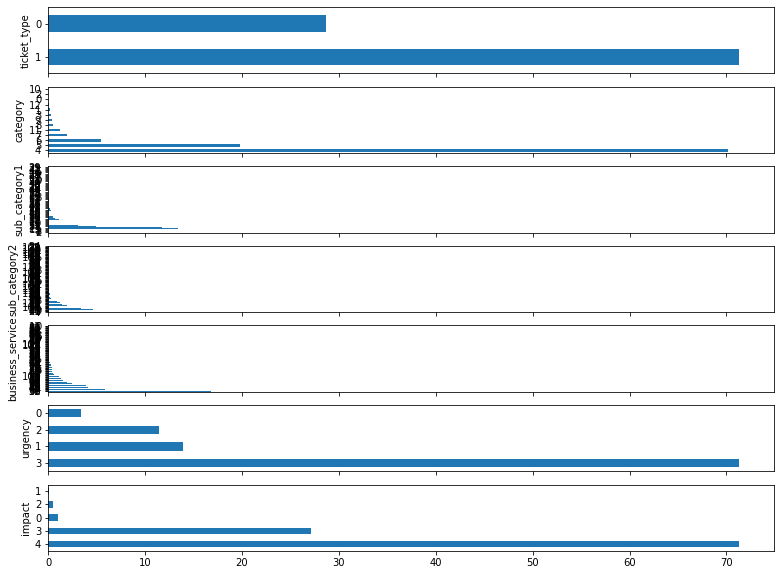

In [7]:
fig, axes = plt.subplots(nrows=len(df_tickets_cat.columns), sharex=True, figsize=(13,10))
percentages = []
for ix,col in enumerate(df_tickets_cat.columns):
    series = df_tickets[col].value_counts(normalize=True)*100
    series.plot(kind='barh', ax=axes[ix])
    axes[ix].set_ylabel(col)

Based on the plots, we see that with the support `ticket_types`, `category`, `urgency`, and `impact` are highly imbalanced, with one category occurring much more frequently than all other categories at around 70% of the total.

> When it comes to categories, imbalanced proportion does not necessarily suggest bad performance in relation to the most frequent category. However, some insights could at least be gained by exploring the nature of the customer problem in that category. In a SaaS context, it is possible, for example, that maybe it is a UX or UI related issue that is encountered by many customers which could be addressed with a better design or layout. In general, it might also possible that that specific type of problem is trivial and can be addressed with a self-service system for the customers and thus reducing the overall number of support tickets.

We list the following categories and subcategories, and business_service type and their corresponding percentage of the total below:

In [8]:
for col in ['category', 'sub_category1', 'sub_category2', 'business_service']:
    for category,percentage in df_tickets.value_counts(col, normalize=True).iteritems():
        print(f'{col} {category}: {percentage*100:.2f}%')
        break

category 4: 70.16%
sub_category1 2: 20.30%
sub_category2 7: 37.48%
business_service 32: 16.84%


..

> Another thing of note is the interrelatedness of `impact` and `urgency`. Intuitively, the opposite scales of impact and urgency should correspond with each other with high urgency support ticket likely has high business impact as well and vice-versa. Consequently, high impact and high urgency tickets should also place the highest priority, medium impact and medium urgency tickets get medium priority, and low impact and low urgency get least priority.

<AxesSubplot:xlabel='urgency,impact'>

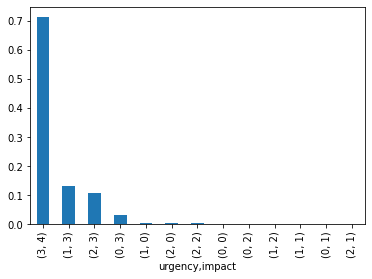

In [9]:
df_tickets.value_counts(["urgency", "impact"], normalize=True).plot(kind='bar')

The Endava dataset does not provide specific details on the urgency and impact categories but from the frequency plot above, we see that tickets with `4` urgency and `3` impact occur around 70% of all tickets while the opposite extreme end of the scale at `0` urgency and `1` impact is the second least frequent. From this, we will assume that the most frequent are the "trivial", whereas the low impact and low urgency tickets are the least frequent. 

> In general, the number of high priority tickets should be minimized as much as possible in order to have a systematic prioritization of the support tasks. If urgency and impact of the problem are the basis of prioritization, as they usually are, there should be a clear policy in place to define what constitutes each scale in order to not have a confusion of priorities. 

This is the end of the preliminary exploratory data analysis.